# torch


### c'est quasi comme numpy

In [38]:
import torch
import numpy as np
import matplotlib.pyplot as plt


In [39]:
a = np.ones((5,10))
a

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [40]:
a = torch.ones((5,10))
a

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [41]:
b = torch.rand((10, 3))
b

tensor([[0.0128, 0.2597, 0.6679],
        [0.8597, 0.4784, 0.7172],
        [0.2827, 0.5649, 0.4146],
        [0.6016, 0.1886, 0.9234],
        [0.5737, 0.0919, 0.1255],
        [0.4036, 0.6591, 0.9402],
        [0.0390, 0.3722, 0.0499],
        [0.8760, 0.5540, 0.7918],
        [0.3528, 0.2186, 0.4321],
        [0.9365, 0.3762, 0.9308]])

In [42]:
a @ b

tensor([[4.9383, 3.7637, 5.9933],
        [4.9383, 3.7637, 5.9933],
        [4.9383, 3.7637, 5.9933],
        [4.9383, 3.7637, 5.9933],
        [4.9383, 3.7637, 5.9933]])

In [43]:
a + 1

tensor([[2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]])

In [44]:
a.shape

torch.Size([5, 10])

In [45]:
a.dtype

torch.float32

### mais ça marche sur GPU (quand on est riche)

In [46]:
a.device

device(type='cpu')

In [47]:
a2 = a.to('cuda')


In [48]:
a2 + 2

tensor([[3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3., 3., 3., 3., 3., 3.]], device='cuda:0')

In [49]:
n = 1000
a = torch.rand((n, n))
b = torch.rand((n, n))
a2 = a.to('cuda')
b2 = b.to('cuda')


In [50]:
%timeit a @ b
%timeit a2 @ b2


3.75 ms ± 1.1 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
349 μs ± 1.16 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### torch dataset

In [51]:
from torchvision import datasets
from torchvision.transforms import ToTensor


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

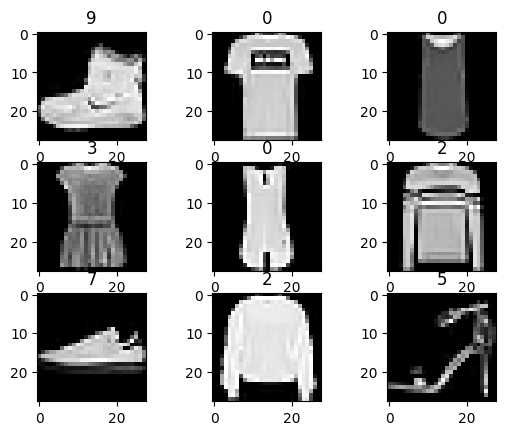

In [52]:
fig, axs = plt.subplots(nrows=3, ncols=3)
for i in range(9):
    ax = axs.flatten()[i]
    img, label = training_data[i]
    img.shape
    
    ax.imshow(img[0, :, :], cmap="grey")
    ax.set_title(label)

    # figure.add_subplot(rows, cols, i)
    # plt.title(labels_map[label])
    # plt.axis("off")
    # plt.imshow(img.squeeze(), cmap="gray")

### ça sert surtout à faire des NN

In [53]:
from torch import nn

In [54]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [55]:
model = NeuralNetwork().to("cuda")
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


#### visualisation du model

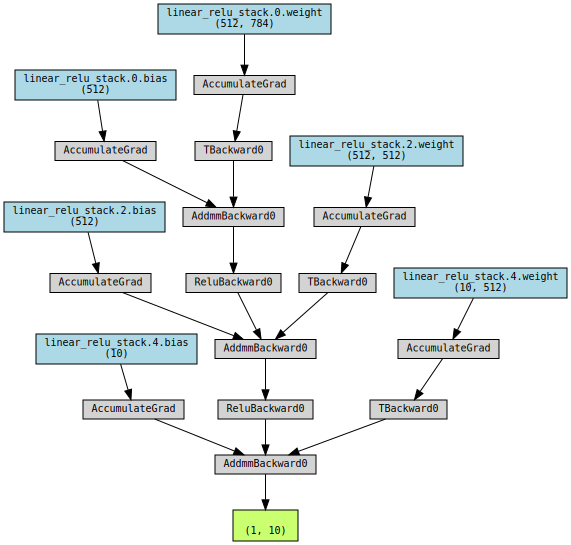

In [56]:
from torchviz import make_dot

model = NeuralNetwork()
x = img
y = model(x)
make_dot(y, params=dict(model.named_parameters()))

#### on lance la descente de gradient et on mesure le score (accuracy)

In [58]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [59]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [60]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.303009  [   64/60000]
loss: 2.294929  [ 6464/60000]
loss: 2.279410  [12864/60000]
loss: 2.272595  [19264/60000]
loss: 2.260037  [25664/60000]
loss: 2.229796  [32064/60000]
loss: 2.235579  [38464/60000]
loss: 2.205197  [44864/60000]
loss: 2.199321  [51264/60000]
loss: 2.177166  [57664/60000]
Test Error: 
 Accuracy: 46.4%, Avg loss: 2.165873 

Epoch 2
-------------------------------
loss: 2.172222  [   64/60000]
loss: 2.165581  [ 6464/60000]
loss: 2.108215  [12864/60000]
loss: 2.127731  [19264/60000]
loss: 2.091396  [25664/60000]
loss: 2.021896  [32064/60000]
loss: 2.058607  [38464/60000]
loss: 1.979526  [44864/60000]
loss: 1.975688  [51264/60000]
loss: 1.929750  [57664/60000]
Test Error: 
 Accuracy: 59.3%, Avg loss: 1.911519 

Epoch 3
-------------------------------
loss: 1.932220  [   64/60000]
loss: 1.913309  [ 6464/60000]
loss: 1.790912  [12864/60000]
loss: 1.845976  [19264/60000]
loss: 1.759558  [25664/60000]
loss: 1.682272  [32064/600